 # Import for Important libiraries
    


In [1]:
import pandas as pd
import datetime as datetime
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("../input/netflix-shows/netflix_titles.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Drop The Unnecessary Columns 

In [5]:
# convert date_added column into Timestamp column
data['date_added'] = pd.to_datetime(data.date_added)

# Feature Engineering 

In [6]:
# Adding new columns [added_month , added_year , added_day , added_day_name]

data["added_month"] = pd.to_datetime(data.date_added, format="%d/%m/%Y").dt.month
data["added_year"] = pd.to_datetime(data.date_added, format="%d/%m/%Y").dt.year
data["added_day"] = pd.to_datetime(data.date_added, format="%d/%m/%Y").dt.day
data["added_day_name"] = pd.to_datetime(data.date_added, format="%d/%m/%Y").dt.day_name()

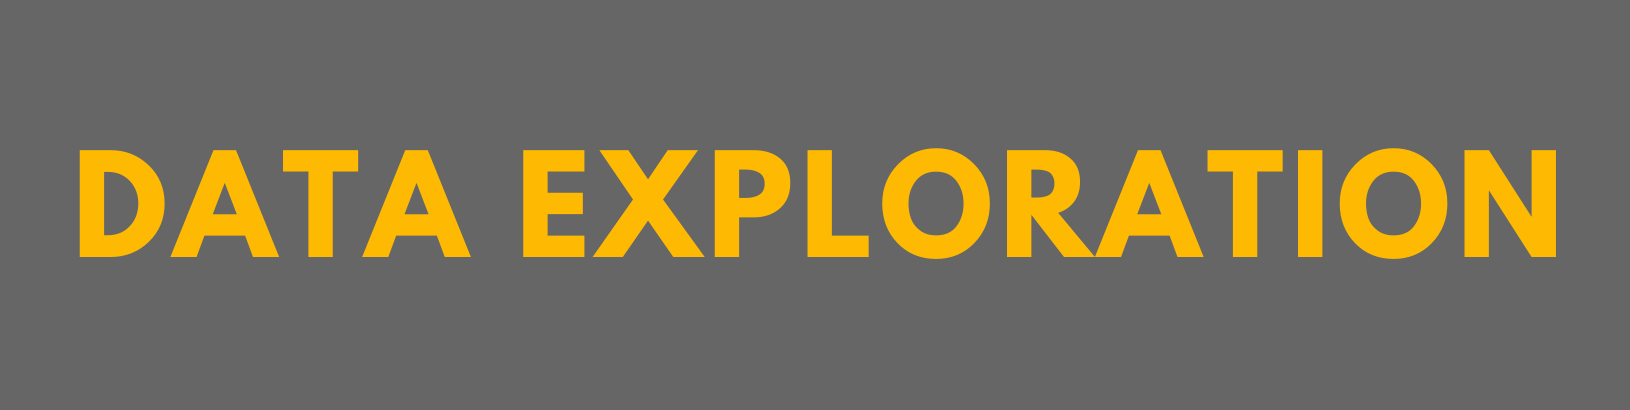

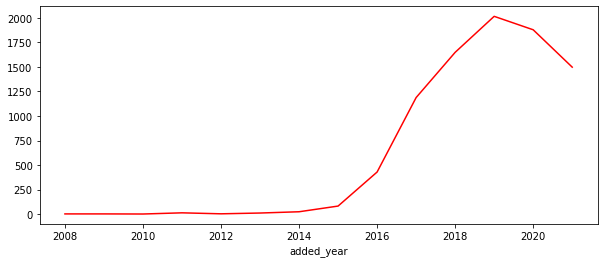

In [7]:
shows_per_year = data.groupby("added_year")["title"].count()
shows_per_year.plot(kind ="line",figsize=(10,4),color="r");

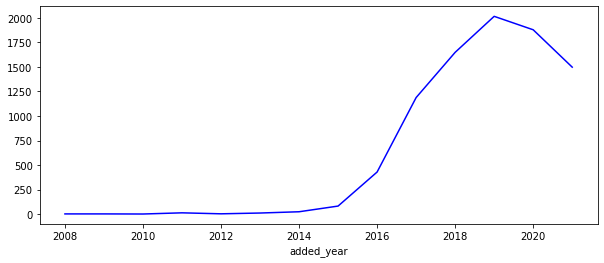

In [8]:
shows_per_year = data.groupby("added_year")["title"].count()
shows_per_year.plot(kind ="line",figsize=(10,4),color="b");

<div style={"background-color:red"}></div>

In [9]:
# For viz: Ratio of Movies & TV shows

x=data.groupby(['type'])['type'].count()
y=len(data)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

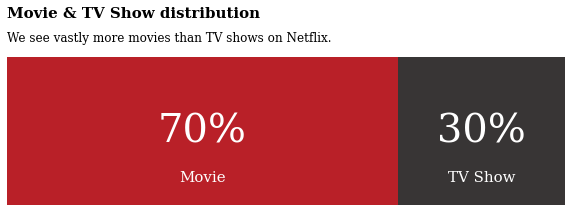

In [10]:

fig, ax = plt.subplots(1,1,figsize=(10, 3))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.92,'We see vastly more movies than TV shows on Netflix.',fontfamily='serif',fontsize=12)  

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

# Top 10 Categories

In [11]:
list_of_categories = []
for i in data["listed_in"].dropna():
    x = i.split(",")
    for j in x:
        list_of_categories.append(j.strip())
        
list_of_categories = pd.DataFrame(list_of_categories)
top_10_categories = list_of_categories.value_counts()[:10]

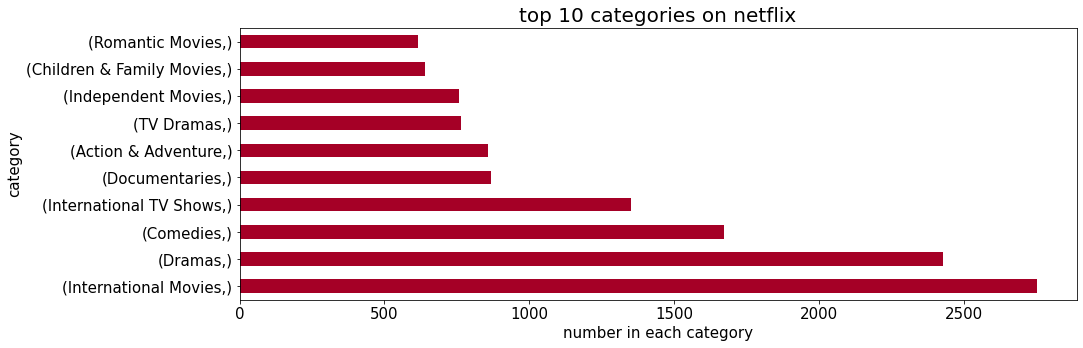

In [12]:
plt.figure(figsize=(15,5))
top_10_categories.plot(kind="barh",fontsize=15,colormap="RdYlBu");
plt.ylabel("category",fontsize=15);
plt.xlabel("number in each category",fontsize=15);
plt.title("top 10 categories on netflix",fontsize=20);
plt.show()

# Top 5 countries

In [13]:
list_of_countries = []
for i in data["country"].dropna():
    x = i.split(",")
    for j in x:
        list_of_countries.append(j.strip())
list_of_countries = pd.DataFrame(list_of_countries)
top_5_countries = list_of_countries.value_counts()[:5]

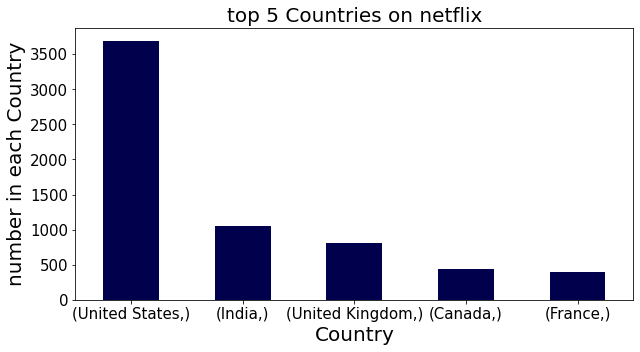

In [14]:
plt.figure(figsize=(10,5))
top_5_countries.plot(kind="bar",fontsize=15,colormap="seismic",rot=0);
plt.xlabel("Country",fontsize=20);
plt.ylabel("number in each Country",fontsize=20);
plt.title("top 5 Countries on netflix",fontsize=20);
plt.show()

-------------------------------------------------------------------------------------------------------------------

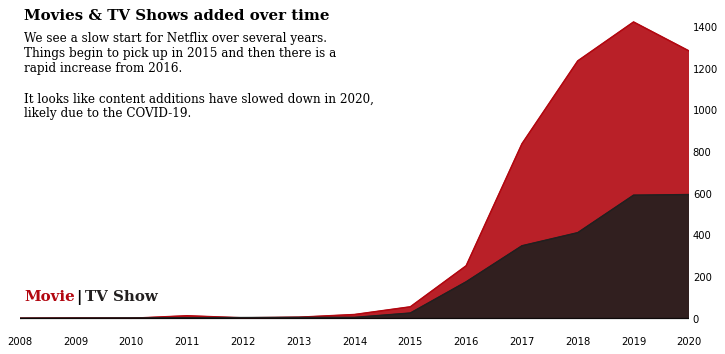

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
color = ["#b20710", "#221f1f"]

for i, mtv in enumerate(data['type'].value_counts().index):
    mtv_rel = data[data['type']==mtv]['added_year'].value_counts().sort_index()
    ax.plot(mtv_rel.index, mtv_rel, color=color[i], label=mtv)
    ax.fill_between(mtv_rel.index, 0, mtv_rel, color=color[i], alpha=0.9)
    
ax.yaxis.tick_right()
    
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

#ax.set_ylim(0, 50)
#ax.legend(loc='upper left')
for s in ['top', 'right','bottom','left']:
    ax.spines[s].set_visible(False)

ax.grid(False)

ax.set_xlim(2008,2020)
plt.xticks(np.arange(2008, 2021, 1))

fig.text(0.13, 0.85, 'Movies & TV Shows added over time', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.13, 0.59, 
'''We see a slow start for Netflix over several years. 
Things begin to pick up in 2015 and then there is a 
rapid increase from 2016.

It looks like content additions have slowed down in 2020, 
likely due to the COVID-19.
'''

, fontsize=12, fontweight='light', fontfamily='serif')


fig.text(0.13,0.2,"Movie", fontweight="bold", fontfamily='serif', fontsize=15, color='#b20710')
fig.text(0.19,0.2,"|", fontweight="bold", fontfamily='serif', fontsize=15, color='black')
fig.text(0.2,0.2,"TV Show", fontweight="bold", fontfamily='serif', fontsize=15, color='#221f1f')

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()


<div style="font-size:40px;font-weight:bolder;background-color:#D240DE;color:white;text-align:center;padding:20px 0;border-radius:15px">Modeling</div>

In [16]:
%matplotlib inline
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.arima_model import ARMA



import warnings
warnings.filterwarnings('ignore')


In [17]:
df = data.groupby("date_added").agg(count=('show_id', 'count'))

In [18]:
df.head()

,count
date_added,
2008-01-01,1
2008-02-04,1
2009-05-05,1
2009-11-18,1
2010-11-01,1


<AxesSubplot:xlabel='date_added'>

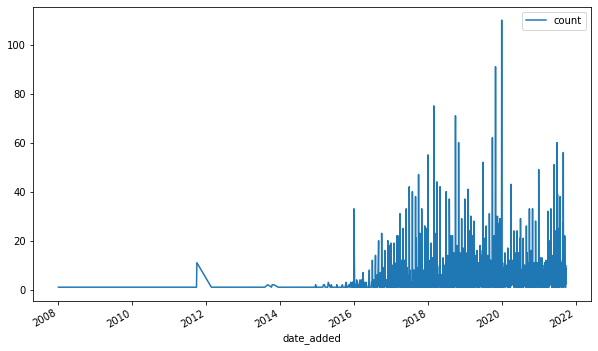

In [19]:
df.plot()

In [20]:
df = df[df.index >"2014-01-01"]

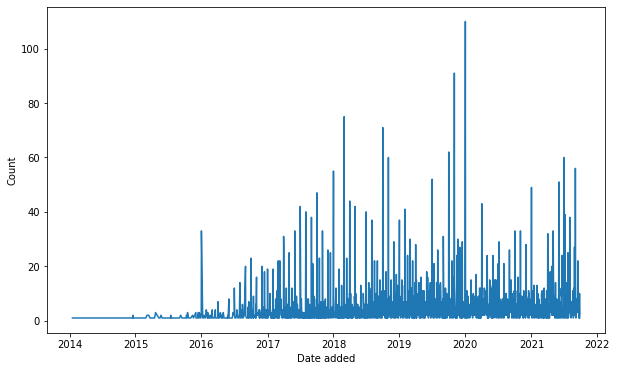

In [21]:
## plot graph
plt.xlabel('Date added')
plt.ylabel('Count')
plt.plot(df)

In [22]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(17,10)) 
    ax1 = fig.add_subplot(211) 
    fig = plot_acf(data , lags = 30 , ax = ax1) 
    ax2 = fig.add_subplot(212) 
    fig = plot_pacf(data , lags = 30 , ax = ax2) 

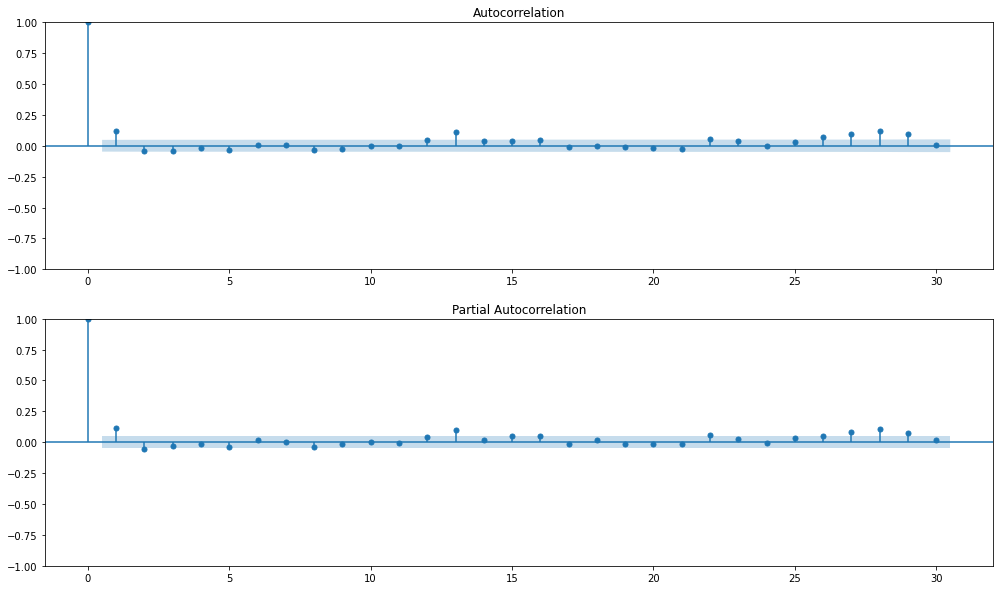

In [23]:
ACF_and_PACF(df)

# Determine rolling statistics

In [24]:
rolmean = df.rolling(window=12).mean()
rolstd = df.rolling(window=12).std()

# plot rolling statistics 

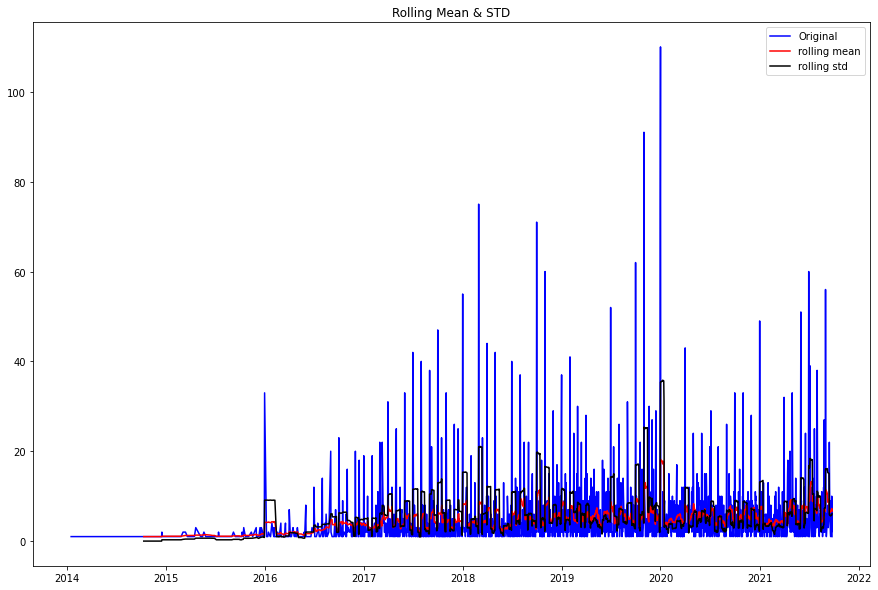

In [25]:
plt.figure(figsize=(15,10))
orig= plt.plot(df , color = "blue" , label = "Original") 
mean = plt.plot(rolmean , color = "red" , label = "rolling mean") 
std = plt.plot(rolstd , color = "black" , label = "rolling std") 
plt.legend(loc = "best") 
plt.title ("Rolling Mean & STD") 
plt.show()

In [26]:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['count'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -8.565718e+00
p-value                        8.457636e-14
#Lags Used                     1.500000e+01
Number of Observations Used    1.679000e+03
Critical Value (1%)           -3.434251e+00
Critical Value (5%)           -2.863263e+00
Critical Value (10%)          -2.567687e+00
dtype: float64


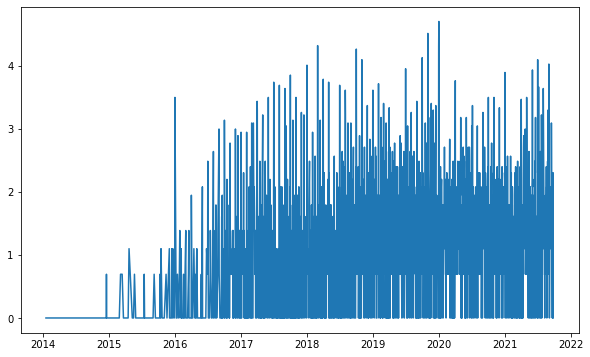

In [27]:
#Estimating trend
df_logScale = np.log(df)
plt.plot(df_logScale)

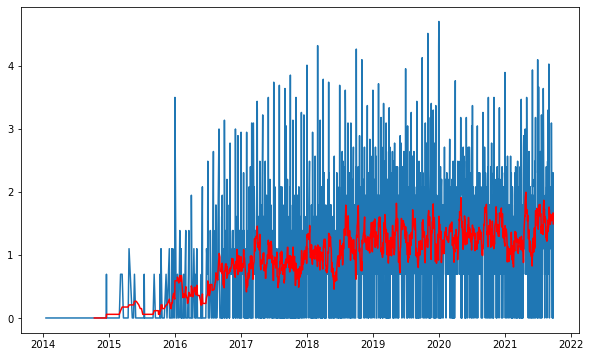

In [28]:
#The below transformation is required to make series stationary
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage, color='red')

In [29]:
dfLogScaleMinusMovingAverage = df_logScale - movingAverage
dfLogScaleMinusMovingAverage.head(12)

#Remove NAN values
dfLogScaleMinusMovingAverage.dropna(inplace=True)
# dfLogScaleMinusMovingAverage.head(10)

In [30]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['count'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

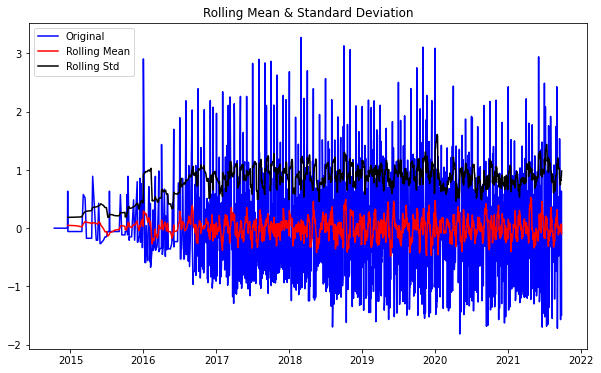

Results of Dickey Fuller Test:
Test Statistic                -1.372096e+01
p-value                        1.188147e-25
#Lags Used                     2.500000e+01
Number of Observations Used    1.658000e+03
Critical Value (1%)           -3.434300e+00
Critical Value (5%)           -2.863285e+00
Critical Value (10%)          -2.567699e+00
dtype: float64


In [31]:
test_stationarity(dfLogScaleMinusMovingAverage)

<AxesSubplot:xlabel='date_added'>

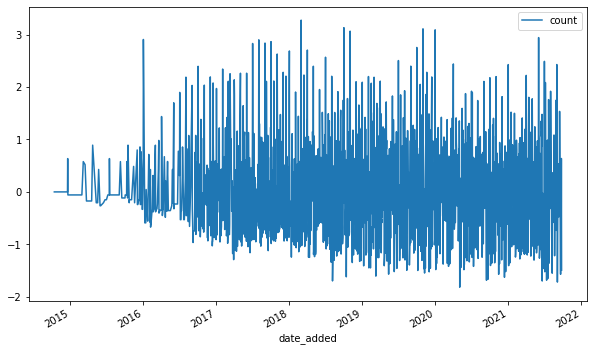

In [32]:
dfLogScaleMinusMovingAverage.plot()

# Model 

In [33]:
data = dfLogScaleMinusMovingAverage.dropna()

In [34]:
from statsmodels.tsa.arima_model import ARIMA

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                 1684
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2165.723
Date:                Thu, 29 Sep 2022   AIC                           4339.447
Time:                        15:00:02   BIC                           4361.162
Sample:                             0   HQIC                          4347.490
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.023      0.179      0.858      -0.042       0.050
ar.L1          0.0771      0.024      3.182      0.001       0.030       0.125
ar.L2         -0.0945      0.025     -3.725      0.0

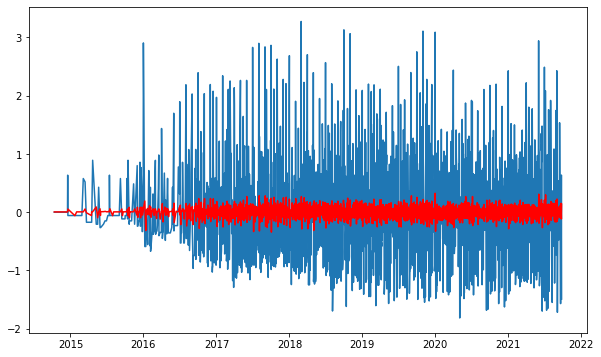

In [35]:
# AR model 
model = sm.tsa.arima.ARIMA(data , order=(2,0,0))
res_ar = model.fit()
plt.plot(data)
plt.plot(res_ar.fittedvalues,color="red")
print(res_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                 1684
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -2084.040
Date:                Thu, 29 Sep 2022   AIC                           4178.081
Time:                        15:00:03   BIC                           4205.225
Sample:                             0   HQIC                          4188.135
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.002      2.210      0.027       0.000       0.008
ar.L1          0.9598      0.024     39.986      0.000       0.913       1.007
ar.L2         -0.1790      0.024     -7.398      0.0

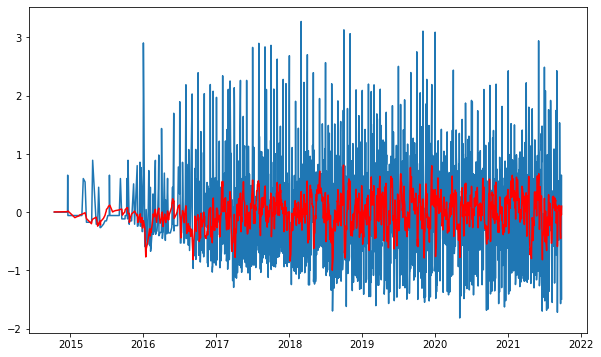

In [36]:
# ARMA model 
model = sm.tsa.arima.ARIMA(data , order=(2,0,1))
res_ar = model.fit()
plt.plot(data)
plt.plot(res_ar.fittedvalues,color="red")
print(res_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  count   No. Observations:                 1684
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2173.990
Date:                Thu, 29 Sep 2022   AIC                           4357.980
Time:                        15:00:06   BIC                           4385.122
Sample:                             0   HQIC                          4368.033
                               - 1684                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9146      0.028    -32.652      0.000      -0.970      -0.860
ar.L2          0.0784      0.025      3.146      0.002       0.030       0.127
ma.L1         -0.0125      0.483     -0.026      0.9

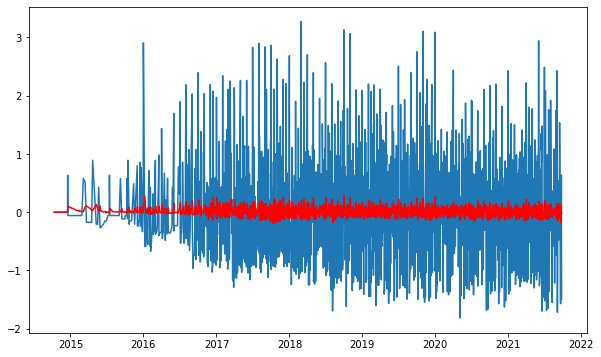

In [37]:
# AR model 
model = sm.tsa.arima.ARIMA(data , order=(2,1,2))
res_ar = model.fit()
plt.plot(data)
plt.plot(res_ar.fittedvalues,color="red")
print(res_ar.summary())